<h1>Índices<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Derivada-Central" data-toc-modified-id="Derivada-Central-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Derivada Central</a></span></li><li><span><a href="#Algorítimo-de-Newton-Raphson" data-toc-modified-id="Algorítimo-de-Newton-Raphson-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algorítimo de Newton-Raphson</a></span><ul class="toc-item"><li><span><a href="#Exemplo-do-Slide" data-toc-modified-id="Exemplo-do-Slide-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exemplo do Slide</a></span></li></ul></li><li><span><a href="#Catenária" data-toc-modified-id="Catenária-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Catenária</a></span></li><li><span><a href="#Gráfico" data-toc-modified-id="Gráfico-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gráfico</a></span></li><li><span><a href="#Exemplo" data-toc-modified-id="Exemplo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exemplo</a></span></li><li><span><a href="#Rigidez-do-Sistema" data-toc-modified-id="Rigidez-do-Sistema-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rigidez do Sistema</a></span></li><li><span><a href="#Catenaria:-Monte-Carlo" data-toc-modified-id="Catenaria:-Monte-Carlo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Catenaria: Monte Carlo</a></span></li></ul></div>

<a rel="license" href="http://creativecommons.org/licenses/by-sa/3.0/br/"><img alt="Licença Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/3.0/br/88x31.png" /></a><br />Este obra está licenciado com uma Licença <a rel="license" href="http://creativecommons.org/licenses/by-sa/3.0/br/">Creative Commons Atribuição-CompartilhaIgual 3.0 Brasil</a>.

<img src="https://github.com/Magreenn/nbinteract-server/blob/main/Tecnicas/img/Logo-Poli_colorida_horizontal.png?raw=true" width=700 />

# Tecnicas de Programação <a class="tocSkip"> </a>
## *Catenária: Problema de Riser suspenso por um cabo*<a class="tocSkip"> </a>

###### João Pedro Nunes Cavalcante  DRE: 116082493
###### André Vitor Bolanho Rocha de Oliveira DRE: 116180429 
###### Polyanna Pascoal de Sousa Domingues DRE: 116158456

---

#### Algumas bibliotecas usadas durante esse notebook <a class="tocSkip"> </a>

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from jupyterthemes import jtplot as jt
from ipywidgets import Layout, FloatText, interactive
jt.style(theme="gruvboxd")

---

## Derivada Central

In [2]:
def df(f, x, h):
    """Calcula uma aproximação da primeira derivada de f, nos pontos do vetor x, usando passos de tamanho h."""
    return (f(x+h) - f(x-h))/(2*h)

---

## Algorítimo de Newton-Raphson

In [3]:
def newton(f, x0, Y=0, prec_x=1e-6, prec_y=1e-6, maxsteps=100):
    """Método de Newton para encontrar o zero de f.

    Retorna uma lista dos pontos considerados, exceto o ponto inicial.

    `df' é uma função que retorna a derivada de f, e `x0' é o valor
    inicial da iteração."""
    x_list = []
    for i in range(maxsteps):
        passo = (f(x0)-Y)/df(f, x0, prec_x)
        x = x0 - passo
        x_list.append(x)
        if abs(passo) < prec_x or abs(f(x)-Y) < prec_y:
            return x_list
        x0 = x
    raise "O Número Máximo de Iterações foi atingido"

### Exemplo do Slide

In [4]:
def func(x): return x**2 - 2*x - 3

In [5]:
r1 = newton(func, 5)
r2 = newton(func, -5)
r3 = newton(func, 5,Y=1, prec_x=1e-6, prec_y=1e-6)
r1, r2, r3

([3.500000000209667,
  3.0500000001428362,
  3.0006097561076746,
  3.000000092922425],
 [-2.3333333337060744,
  -1.2666666669578717,
  -1.0156862745252164,
  -1.0000610360862474,
  -1.0000000009313168],
 [3.6250000001921947, 3.26488095244652, 3.236251251494051, 3.2360679850100023])

---

## Catenária

In [6]:
def catenaria(L, st, xa, ya, w, theta, prec=1e-3):
    theta_i = 1
    theta_f = theta
    fh_i = 1
    xt_i = 200
    while abs(theta_f-theta_i) > prec:
        theta_i = theta_f
        yc_i = ya-L*m.cos(theta_i)
        xt_2 = xa-L*m.sin(theta_i)
        while abs(xt_i-xt_2) > prec:
            a = fh_i/w
            xc = a*m.acosh((yc_i+a)/a)
            s = a*m.sinh(xc/a)
            fv = w*s
            ft = m.sqrt(fh_i**2 + fv**2)
            xh = st-s
            # trocando tetha
            theta_f = m.atan(fh_i/fv)
            # trocando xt
            xt_i = xh+xc
            G = lambda fh: (xh + ((fh/w)*m.acosh((yc_i*w+fh)/fh)))
            lista = newton(G, x0=fh_i, Y=xt_2)
            fh_i = lista[-1]
    return fh_i, theta_f , ft

In [7]:
fh, theta,_ = catenaria(L=2, xa=33, ya=20, w=400, st=46, theta=5)
print(f'A força horizontal é de {fh:.3f}N',
      f'O ângulo teta é de {m.degrees(theta):.2f}°', sep="\n")

A força horizontal é de 1048.426N
O ângulo teta é de 7.30°


---

## Gráfico

In [8]:
def plot(L, xa, ya, w, st, theta, prec):
    # dados
    fh, theta, ft = catenaria(L, st, xa, ya, w, theta, prec)
    xt = xa-L*m.sin(theta)
    yc = ya-L*m.cos(theta)
    a = fh/w
    xc = a*m.acosh((yc+a)/a)
    s = a*m.sinh(xc/a)
    if (xt-xc)>0:
        xh = xt-xc
    else:
        xh=0
    # resposta dos cálculos
    print(f'A força horizontal é de {fh:.2f}N',
          f'O ângulo teta é de {m.degrees(theta):.2f}°',
          f'a = {a:.2f}',
          f'xh = {xh:.2f}m',
          f'xc = {xc:.2f}m',
          f'xt = {xt:.2f}m',
          f'yc = {yc:.2f}m',
          f's = {s:.2f}m',
          f'ft = {ft:.2f}N',sep="\n")
    # plot do riser no solo
    eixo_solo = np.linspace(0, xh)
    plt.plot(eixo_solo, np.zeros(np.shape(eixo_solo)), label="Riser no solo marinho")
    # plot do riser em catenária
    eixo = np.linspace(xh, xt)
    ys = a*(np.cosh((eixo-xh)/a)-1)
    plt.plot(eixo, ys, label="Riser em catenária")
    # plot do cabo
    eixo_cabo = np.linspace(xt, xa)
    cabo = (1/m.tan(theta))*(eixo_cabo-xt)+yc
    plt.plot(eixo_cabo, cabo, label="Cabo de sustentação")
    #eixos
    plt.title(f"Geometria do Problema")
    plt.xlabel("Eixo X (m)")
    plt.ylabel("Eixo Y (m)")
    plt.legend();

---

## Exemplo

In [9]:
style = {'description_width': 'initial'}
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='30%')
L = FloatText(description='Comprimento do Cabo (m):', value=2, style=style, layout = box_layout)
xa = FloatText(description='Distância Horizontal (m):', value=33, style=style, layout = box_layout)
ya = FloatText(description='Profundidade (m):', value=20, style=style, layout = box_layout)
w = FloatText(description='Peso Linear (N/m):', value=400, style=style, layout = box_layout)
st = FloatText(description='Comprimento Riser (m):', value=46, style=style, layout = box_layout)
theta = FloatText(description='Ângulo Inicial (rad):', value=5, style=style, layout = box_layout)
prec = FloatText(description='Precisão:', value=1e-3, style=style, layout = box_layout)
interactive(plot, L=L, xa=xa, ya=ya, w=w, st=st, theta=theta, prec=prec)

interactive(children=(FloatText(value=2.0, description='Comprimento do Cabo (m):', layout=Layout(align_items='…

---

## Rigidez do Sistema

A Rigidez do Sistema é 741.201N/m


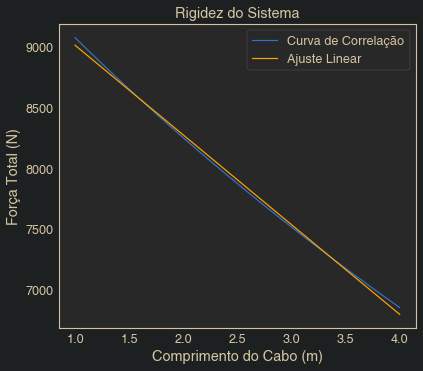

In [10]:
# dados
l_s = np.linspace(1, 4)
ft_s = [catenaria(L=i, xa=33, ya=20, w=400, st=46, theta=5)[2] for i in l_s]
ft_s = np.array(ft_s)
# eixos
plt.title(f"Rigidez do Sistema")
plt.xlabel("Comprimento do Cabo (m)")
plt.ylabel("Força Total (N)")
# ajuste de reta
A = np.vstack([l_s, np.ones(len(l_s))]).T
E, c = np.linalg.lstsq(A, ft_s, rcond=None)[0]
y_s = E*l_s+c
# plot
plt.plot(l_s, ft_s, label="Curva de Correlação")
plt.plot(l_s, y_s, color="Orange", label="Ajuste Linear")
plt.legend()
print(f'A Rigidez do Sistema é {-E:.3f}N/m')

---

## Catenaria: Monte Carlo